In [2]:
import os 
import pandas as pd 
from natsort import natsorted
from tqdm import tqdm

def load_run(run="run1"):
  folders = natsorted([a for a in os.listdir("generated/%s/"%run) if ".txt" not in a ])[-8:]

  df = []
  pbar = tqdm(folders)
  for folder in pbar:
    print(folder)
    file = "generated/%s/%s/data.csv"%(run, folder)
    if os.path.isfile(file): 
      df.append(pd.read_csv(file, compression="gzip"))
      pbar.set_description(str(df[-1].shape))

  df = pd.concat(df)
  print(df.shape)
  return df 

#df1 = load_run("run1")
#df2 = load_run("run2")
#df3 = load_run("run3")
#df4 = load_run("run4")
#df5 = load_run("run5")
df5 = load_run("run7")

print(df5)


(3301, 17):  12%|█▎        | 1/8 [00:00<00:01,  5.16it/s]

0_GDB11_f32True_grid0_backendipu_5698654_8547980
1_GDB11_f32True_grid0_backendipu_0_2849326


(2308, 17):  75%|███████▌  | 6/8 [00:00<00:00, 12.07it/s]

2_GDB11_f32True_grid0_backendipu_11397308_14246634
3_GDB11_f32True_grid0_backendipu_19945289_22794615
4_GDB11_f32True_grid0_backendipu_8547981_11397307
5_GDB11_f32True_grid0_backendipu_14246635_17095961
6_GDB11_f32True_grid0_backendipu_2849327_5698653


(3243, 17): 100%|██████████| 8/8 [00:00<00:00,  9.98it/s]


7_GDB11_f32True_grid0_backendipu_17095962_19945288
(13708, 17)
      Unnamed: 0                   smile                 atoms  \
0              0     CN(O)C(=N)N=C(NO)NO  CNOCNNCNONOHHHHHHHHH   
1              0      FC1=CC=NN2CCC=CC12  FCCCNNCCCCCHHHHHHHHH   
2              0  FC2(C1CN1)C3CNC(=O)C23  FCCCNCCNCOCHHHHHHHHH   
3              0  OC2(C1CN1)C3COC(=O)C23  OCCCNCCOCOCHHHHHHHHH   
4              0      CC1=NN=CN2OCC=CC12  CCNNCNOCCCCHHHHHHHHH   
...          ...                     ...                   ...   
3238           0      FC1C2NC3CC3OC12C=O   FCCNCCCOCCOHHHHHHHH   
3239           0   CC1=COC2OC(=O)C3C2C13   CCCOCOCOCCCHHHHHHHH   
3240           0        COC(=O)Nc1cccnc1   COCONCCCCNCHHHHHHHH   
3241           0       ONC1=NN2CC2C=CN1O   ONCNNCCCCNOHHHHHHHH   
3242           0        FCC(=C)Oc1cccnc1   FCCCOCCCCNCHHHHHHHH   

                                         atom_positions  \
0     [-4.048766764216121, -1.5815674310531984, 3.67...   
1     [3.6213916623339313,

In [3]:
df5["times"] # I think we'll be forced to store in 1000 smaller files of 1M molecules each. 

0       [  3329.4  80824.9      0.  180047.6      3.3 ...
1       [352.5 177.9   0.   89.2   1.5   0.6   1.9   0.1]
2       [358.   90.2   0.   82.7   2.3   0.5   1.1   0. ]
3       [347.6 105.5   0.   80.1   1.6   0.6   1.1   0. ]
4       [285.1 104.9   0.   84.2   5.8   0.5   1.6   0.1]
                              ...                        
3238    [283.   95.2   0.   99.8   1.2   0.5   1.3   0.1]
3239    [260.8  98.5   0.  100.4   2.1   0.6   1.    0.1]
3240    [319.4  98.3   0.  100.6   4.1   0.6   1.    0. ]
3241    [267.2  95.8   0.  100.    3.3   0.5   1.5   0.1]
3242    [243.9  96.1   0.  100.1   2.3   0.5   1.    0. ]
Name: times, Length: 13708, dtype: object

In [37]:
indxs = df1["pyscf_energies"] != "[0.0]"
df = df1[indxs]

print(df.shape)

#print(df["times"].values[0])

(4075, 17)


()
()


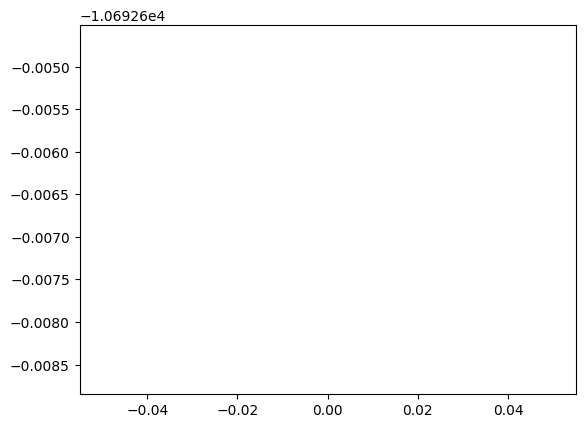

In [38]:
import numpy as np
df.shape
def energies(df): 
  #return np.array( [float(df["energies"].values[i].split(",")[-1][:-1]) for i in range(df.shape[0])])
  return  [np.fromstring(df["energies"].values[i][1:-1], sep=",", dtype=np.float64)   for i in range(df.shape[0])]
def penergies(df): 
  return  [np.fromstring(df["pyscf_energies"].values[i][1:-1], sep=",", dtype=np.float64) for i in range(df.shape[0])]

def energy(df): 
  return np.array( [float(df["energies"].values[i].split(",")[-1][:-1]) for i in range(df.shape[0])])
def penergy(df): 
  return np.array( [float(df["pyscf_energies"].values[i].split(",")[-1][:-1]) for i in range(df.shape[0])])




import matplotlib.pyplot as plt 

print(energy(df)[0].shape)
print(penergy(df)[0].shape)

plt.plot(energy(df)[0])
plt.plot(penergy(df)[0])


(4075, 17) (4075,)


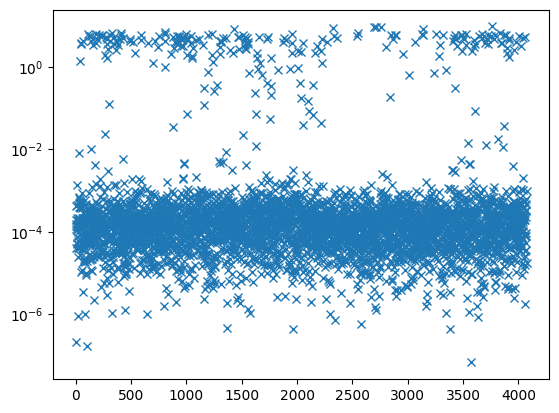

In [39]:
diff = np.abs(df["hlgap"].values -  df["pyscf_hlgap"].values)
print(df.shape, diff.shape)
diff = diff[diff==diff]
plt.plot(diff, 'x')
plt.yscale("log")


(3821, 17) (3821,)


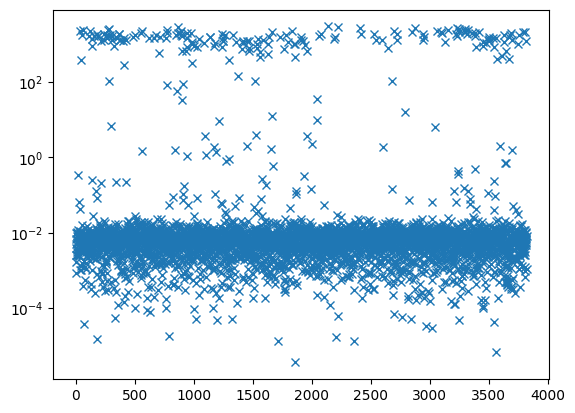

In [35]:
diff = np.abs(energy(df) -  penergy(df))
print(df.shape, diff.shape)
diff = diff[diff==diff]
plt.plot(diff, 'x')
plt.yscale("log")

In [131]:
import numpy as np
int1d = np.intersect1d(df1["smile"],
np.intersect1d(df2["smile"],
np.intersect1d(df3["smile"],
np.intersect1d(df4["smile"],
df5["smile"]))))
print(int1d.shape)

(8446,)


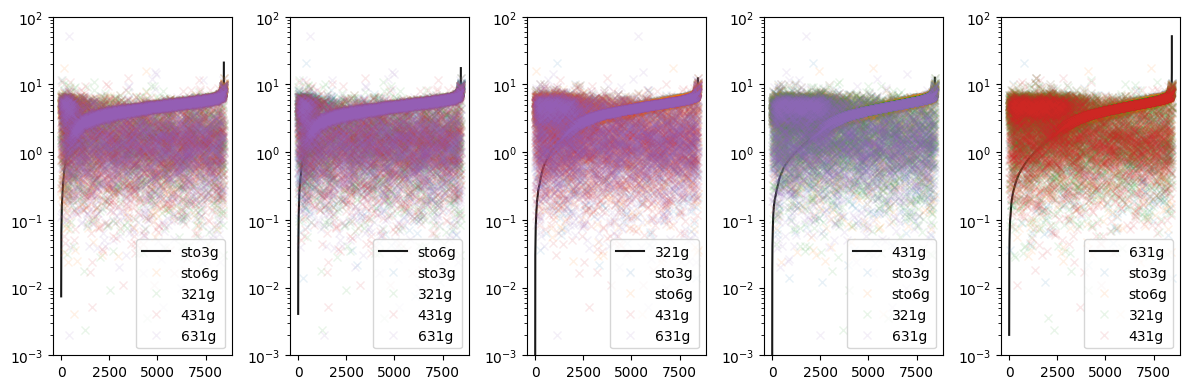

In [133]:
# redo plot with/without converged molecules. 
import matplotlib.pyplot as plt 
names = ["sto3g", "sto6g", "321g", "431g", "631g"]

dfs = [df1, df2, df3, df4, df5]

fig, ax= plt.subplots(1,len(dfs), figsize=(12,4))
for i in range(len(dfs)):


    indxs = np.argsort( dfs[i][dfs[i]["smile"].isin(int1d)]["hlgap"] )

    def p(df):
        ax[i].plot(df[df["smile"].isin(int1d)]["hlgap"].values[indxs], 'C%ix'%j, alpha=0.1, label=names[j])

    df = dfs[i]
    ax[i].plot(df[df["smile"].isin(int1d)]["hlgap"].values[indxs], 'k', alpha=0.9, label=names[i])

    for j in range(len(dfs)):
        ax[j].set_ylim([1e-3, 1e2])
        ax[j].set_yscale("log") 

        if j == i: continue
        p(dfs[j])
    ax[i].legend()


plt.tight_layout()



In [142]:

def energy(df): 
  return np.array( [float(df["energies"].values[i].split(",")[-1][:-1]) for i in range(df.shape[0])])

def std(df): 

  return np.concatenate( [np.std(np.fromstring(df["energies"].values[i][1:-1], sep=",", dtype=np.float64)[-10:]).reshape(1,-1) for i in tqdm(range(df.shape[0]))], axis=0)


In [171]:
print("Hello")
# take a look at the convergence thing. 
stds = [std(df) for df in dfs]

cdfs = [df.copy()[std<0.1] for df,std in zip(dfs, stds)]

print([a.shape for a in cdfs])


Hello


100%|██████████| 14975/14975 [00:00<00:00, 15088.06it/s]


[(259061, 17), (197676, 17), (10706, 17), (7687, 17), (6560, 17)]


In [146]:
print([d.shape for d in dfs])

[(315342, 17), (242591, 17), (19438, 17), (17431, 17), (14975, 17)]


In [173]:
import numpy as np
cint1d = np.intersect1d(cdfs[0]["smile"],
np.intersect1d(cdfs[1]["smile"],
np.intersect1d(cdfs[2]["smile"],
np.intersect1d(cdfs[3]["smile"],
cdfs[4]["smile"]))))
print(int1d.shape, cint1d.shape)

(8446,) (898,)


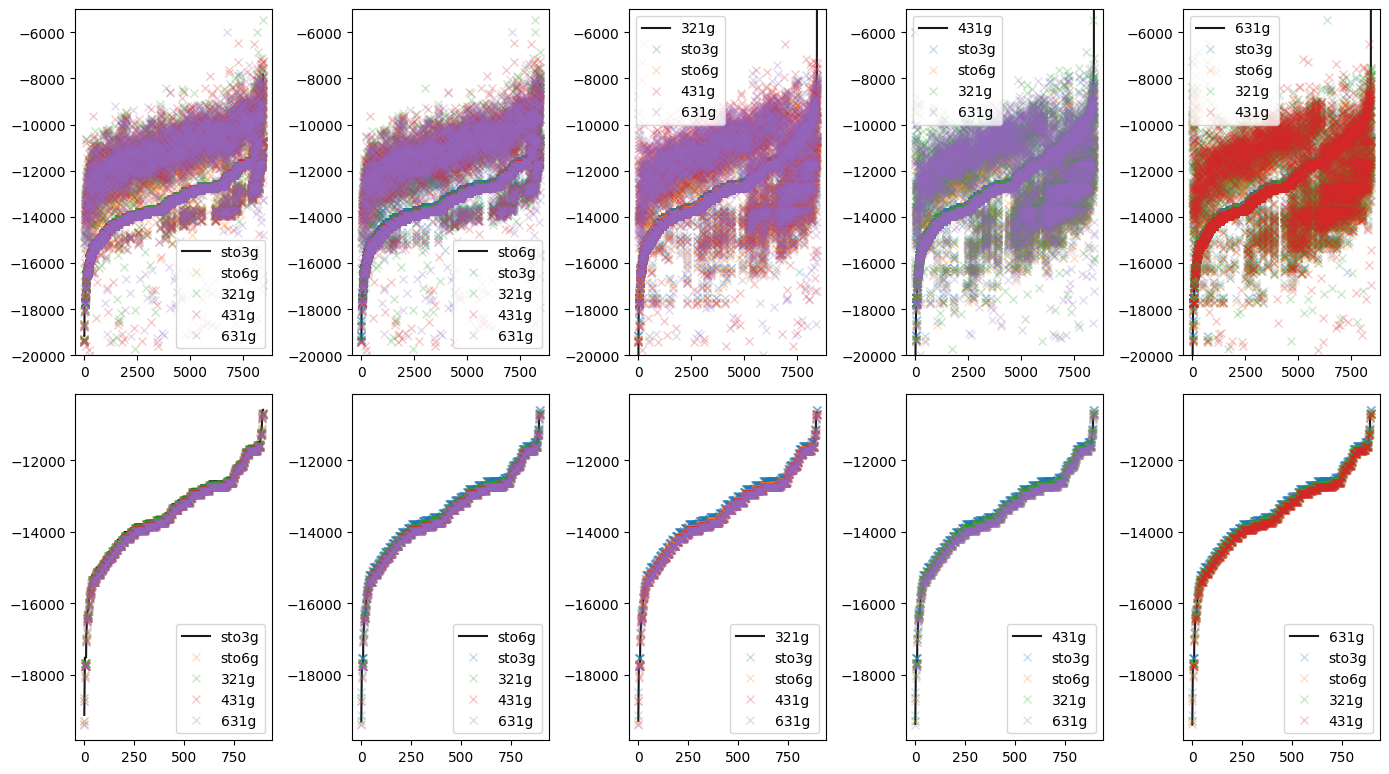

In [177]:
def plot(func):
    import matplotlib.pyplot as plt 
    names = ["sto3g", "sto6g", "321g", "431g", "631g"]

    dfs = [df1, df2, df3, df4, df5]

    fig, ax= plt.subplots(2,len(dfs), figsize=(14,8))
    for i in range(len(dfs)):

        indxs = np.argsort( func( dfs[i][dfs[i]["smile"].isin(int1d)]) )
        cindxs = np.argsort( func( cdfs[i][cdfs[i]["smile"].isin(cint1d)]) )

        def p(df, cdf):
            ax[0,i].plot(func(df[df["smile"].isin(int1d)])[indxs], 'C%ix'%j, alpha=0.25, label=names[j])
            ax[1,i].plot(func(cdf[cdf["smile"].isin(cint1d)])[cindxs], 'C%ix'%j, alpha=0.25, label=names[j])

        df = dfs[i]
        ax[0, i].plot(func(df[df["smile"].isin(int1d)])[indxs], 'k', alpha=0.9, label=names[i])

        df = cdfs[i]
        ax[1, i].plot(func(df[df["smile"].isin(cint1d)])[cindxs], 'k', alpha=0.9, label=names[i])

        for j in range(len(dfs)):
            #ax[0,j].set_ylim([-20000, -5000])
            if j == i: continue
            p(dfs[j], cdfs[j])
        ax[0,i].legend()
        ax[1,i].legend()

    plt.tight_layout()
    return ax 


ax = plot(energy)
for j in range(5):
    ax[0,j].set_ylim([-20000, -5000])

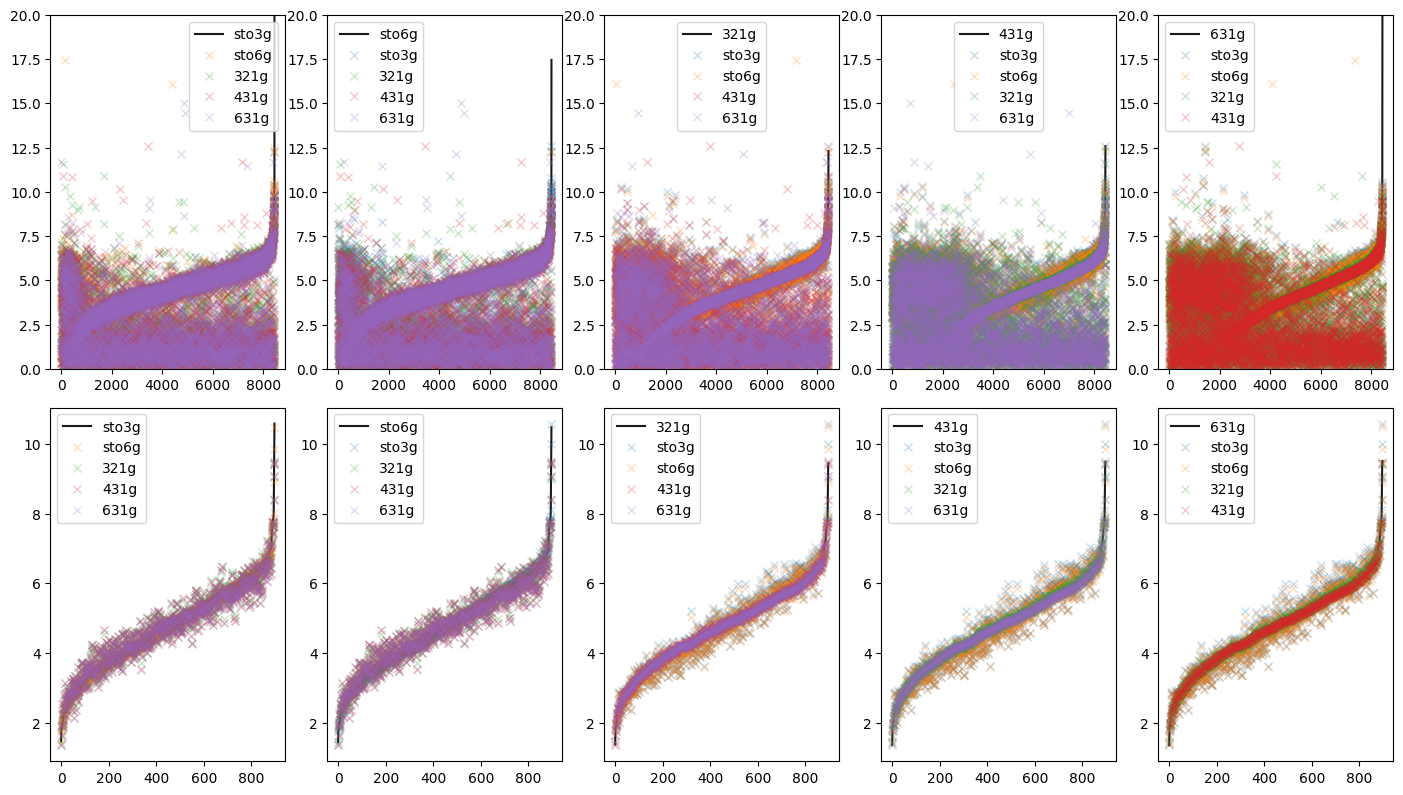

In [179]:
def hlgap(df):
    return df["hlgap"].values
ax = plot(hlgap)
for j in range(5): ax[0,j].set_ylim([0, 20])


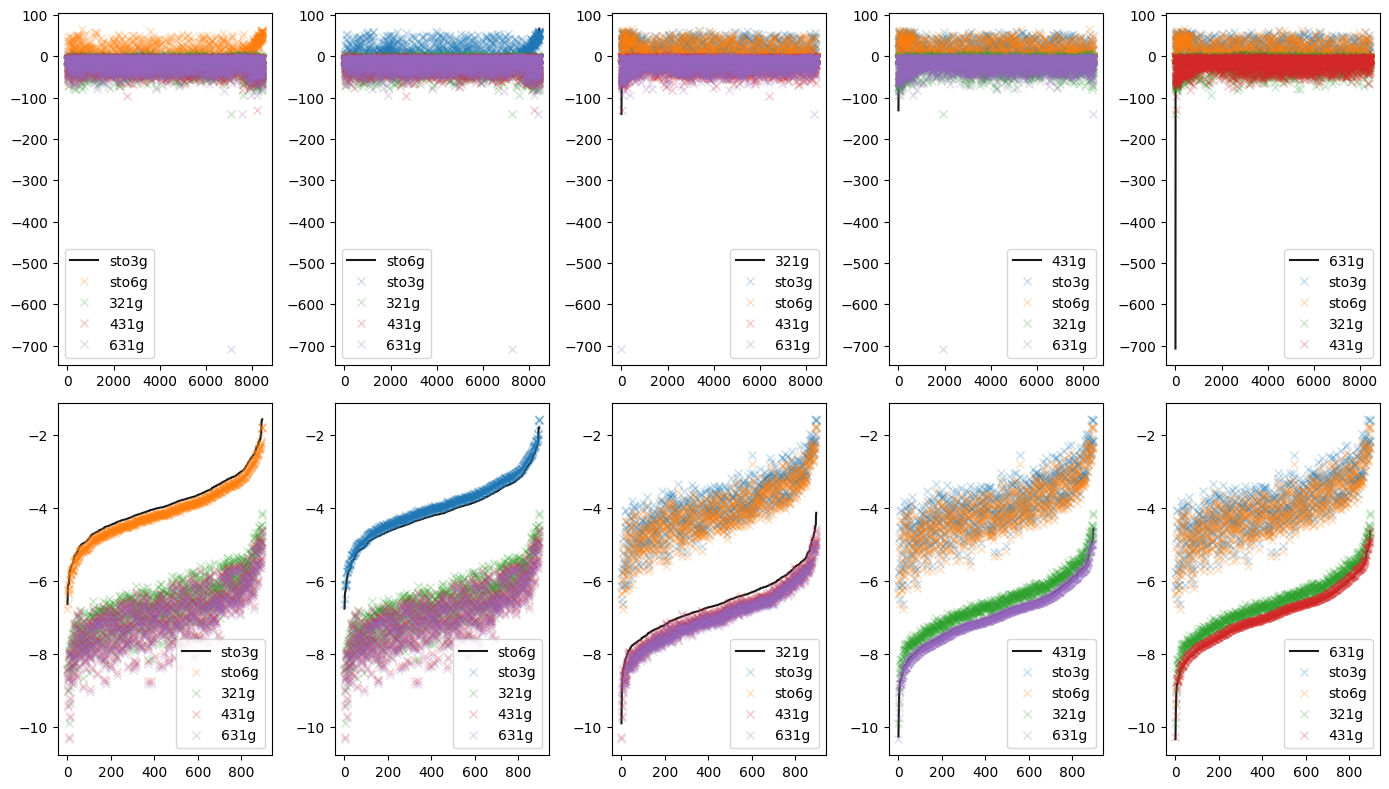

In [181]:

def homo(df):
    return df["homo"].values
ax = plot(homo)
#for j in range(5): ax[0,j].set_ylim([0, 20])

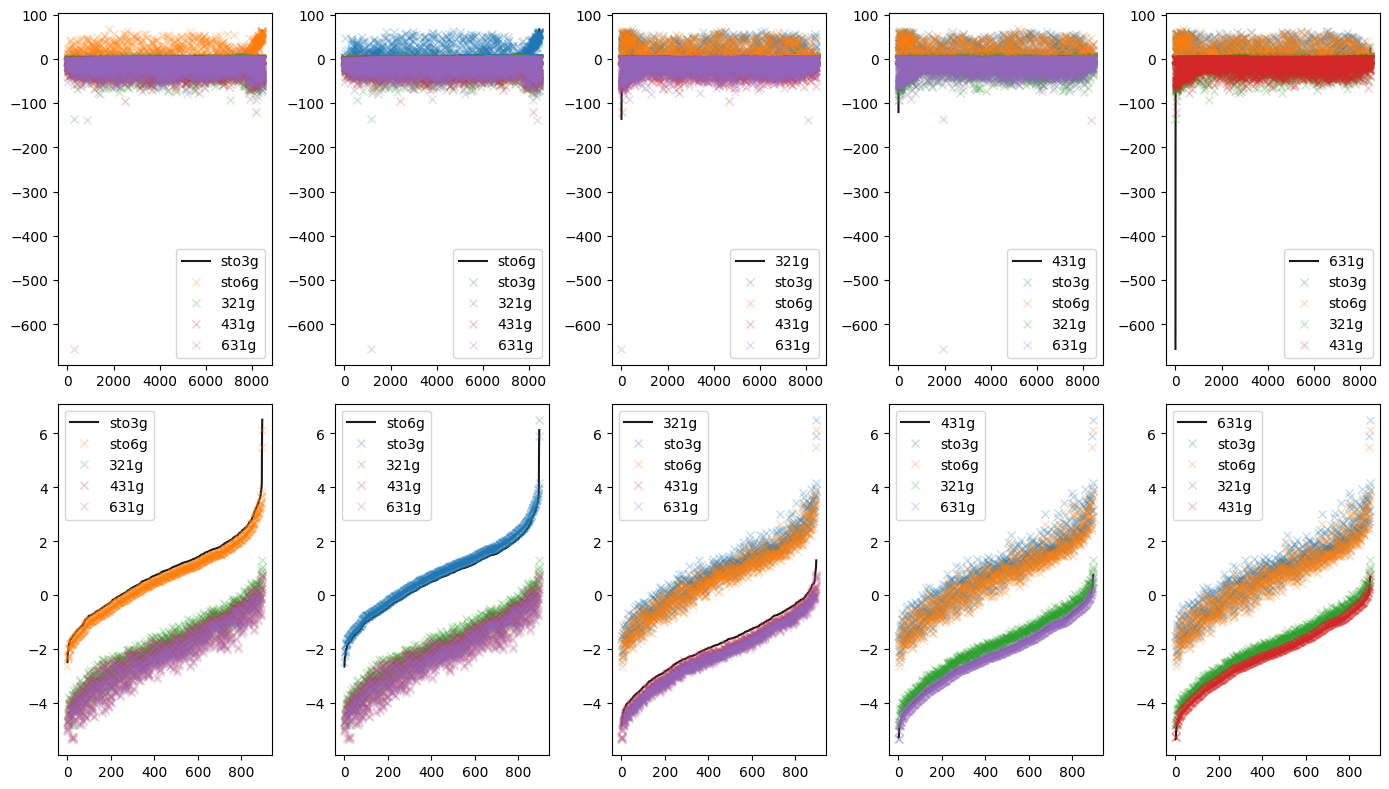

In [180]:
def lumo(df):
    return df["lumo"].values
ax = plot(lumo)
#

In [ ]:
import numpy as np

dfs = 

df1 = df1[std(df1) < 0.01]
df2 = df2[std(df2) < 0.01]


int1d = np.intersect1d(df1["smile"],
np.intersect1d(df2["smile"],
np.intersect1d(df3["smile"],
np.intersect1d(df4["smile"],
df5["smile"]))))
print(int1d.shape)

Index(['Unnamed: 0', 'smile', 'atoms', 'atom_positions', 'energies',
       'pyscf_energies', 'pyscf_hlgap', 'pyscf_homo', 'pyscf_lumo',
       'nuclear_energy', 'times', 'homo', 'lumo', 'hlgap', 'N', 'mem_eri',
       'mem_grid'],
      dtype='object')

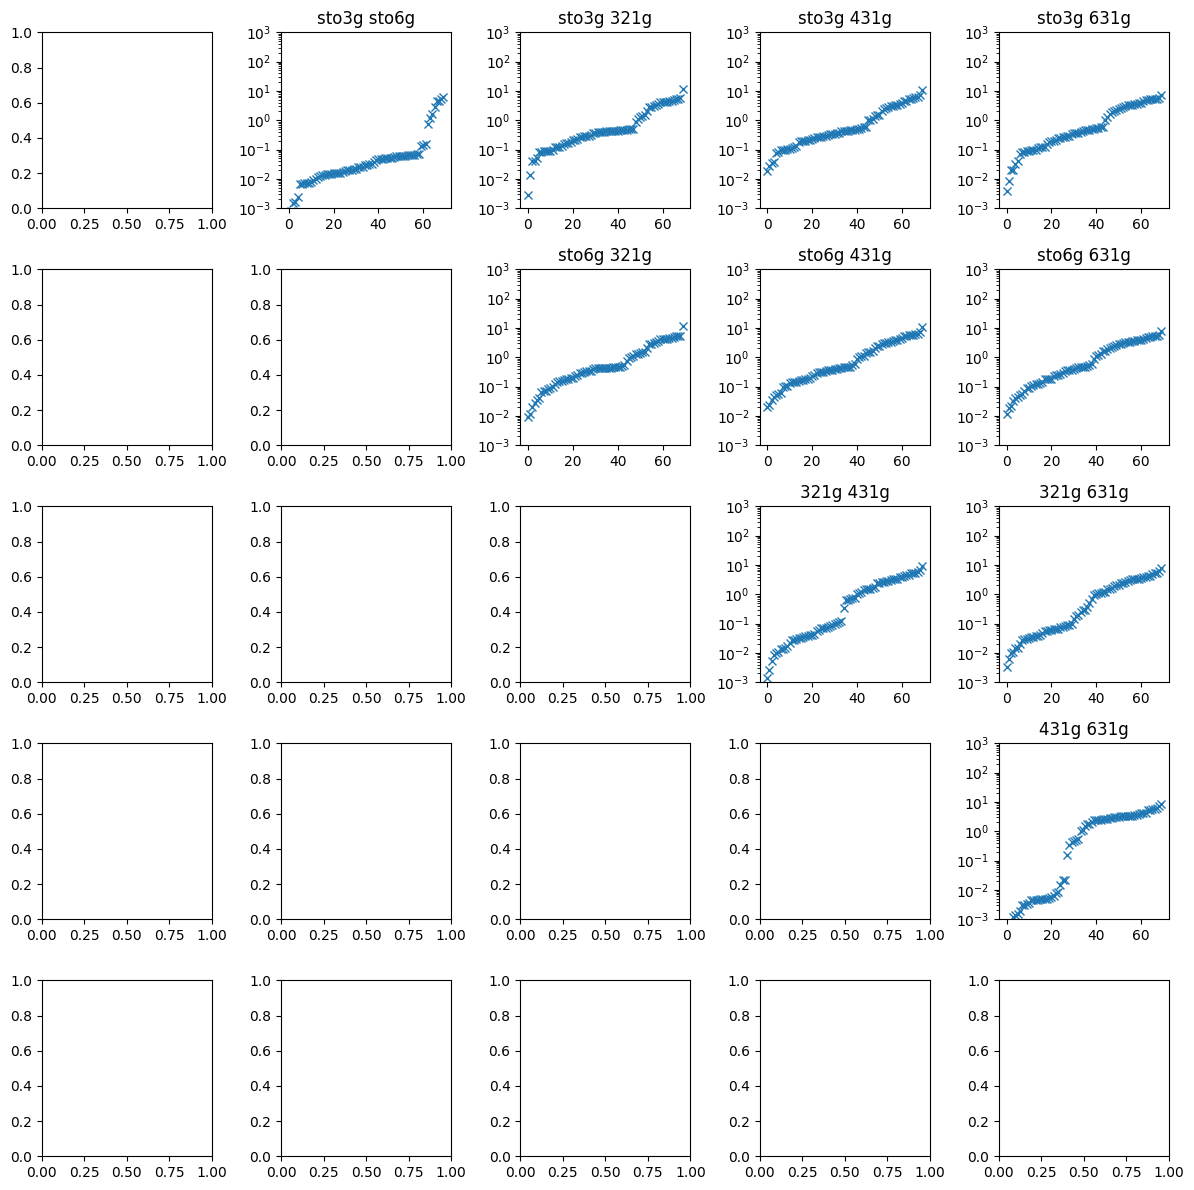

In [67]:
# roughly half is roughly agreeing, lol. 
dfs = [df1, df2, df3, df4, df5]

names = ["sto3g", "sto6g", "321g", "431g", "631g"]

fig, ax = plt.subplots(5,5, figsize=(12,12))


for i in range(5):
    for j in range(5):
        if i >= j: continue
        
        vali = dfs[i][dfs[i]["smile"].isin(int1d)]["hlgap"].values[indxs]
        valj = dfs[j][dfs[j]["smile"].isin(int1d)]["hlgap"].values[indxs]

        ax[i,j].plot(np.sort(np.abs(vali-valj)), 'x')
        ax[i,j].set_yscale("log")
        ax[i,j].set_title("%s %s"%(names[i], names[j]))
        ax[i,j].set_ylim([1e-3, 1e3]) 


plt.tight_layout()

In [101]:
df1.shape

lst = [np.fromstring(df1["pyscf_energies"].values[i][1:-1], sep=",", dtype=np.float64).reshape(1,-1) for i in tqdm(range(df1.shape[0]))]
lst = [a for a in lst if a.shape != (1,1)]
e = [a[0, -1] for a in lst if a.shape != (1,1)]
print([a.shape for a in lst])
print(e)
energies = np.concatenate( lst ,axis=0)

print(energies).shape

100%|██████████| 244/244 [00:00<00:00, 80748.79it/s]

[(1, 11), (1, 14), (1, 15), (1, 12), (1, 10), (1, 13), (1, 13), (1, 10), (1, 10), (1, 11), (1, 10), (1, 10)]
[-14400.002825509919, -13972.035939603886, -12978.753294867933, -11120.491225888698, -12428.397692593126, -13391.679738279543, -11190.68143151536, -11717.743001684594, -11751.312703737638, -10692.604703578989, -10396.952044199363, -10363.996402970535]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 11 and the array at index 1 has size 14

In [9]:
!ls generated/
!pwd

ls: cannot access 'generated/26_GDB9_f32True_grid0_backendipu_55535_111069/': No such file or directory
/nethome/alexm/jaxdft-pre-experimental/data
